In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
diabetes_data=pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

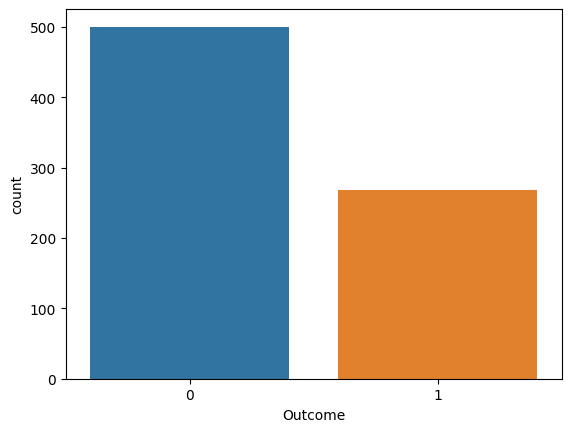

In [ ]:
sns.countplot(x="Outcome",data=diabetes_data)

<Axes: >

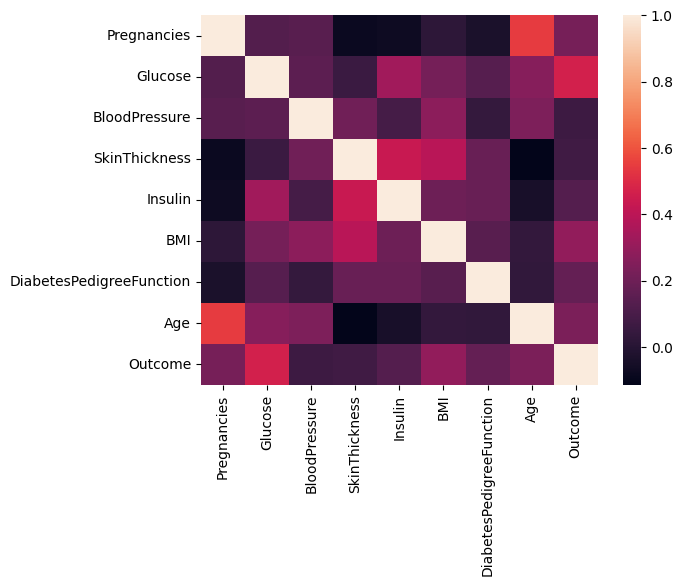

In [ ]:
corr=diabetes_data.corr()
sns.heatmap(corr)

<Axes: xlabel='Glucose', ylabel='BMI'>

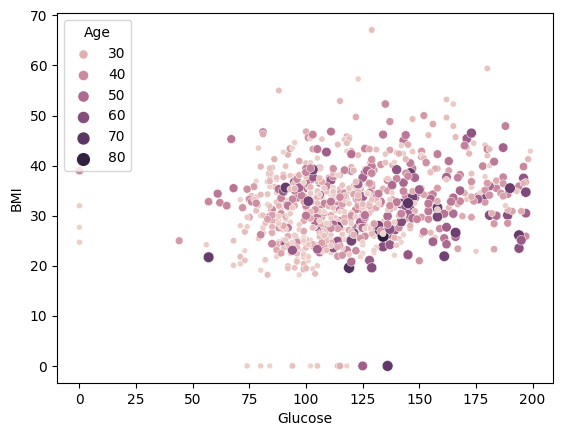

In [ ]:
sns.scatterplot(data=diabetes_data, x="Glucose", y="BMI", hue="Age", size="Age")

<ipython-input-21-1b29a3b3ee1a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(diabetes_data["Pregnancies"][diabetes_data["Outcome"] == 1],
<ipython-input-21-1b29a3b3ee1a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(diabetes_data["Pregnancies"][diabetes_data["Outcome"] == 0],


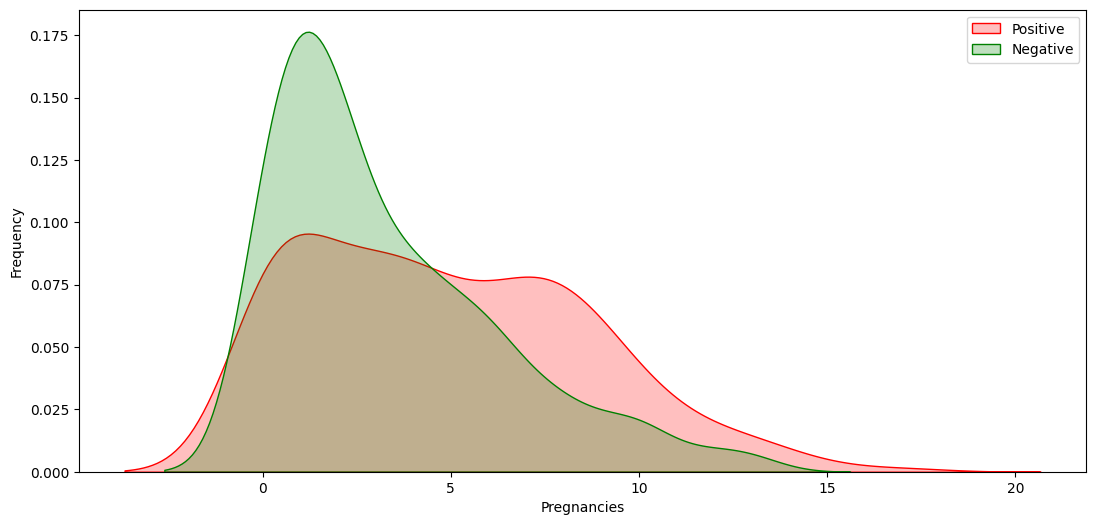

In [ ]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(diabetes_data["Pregnancies"][diabetes_data["Outcome"] == 1],
     color="Red", shade = True)
g = sns.kdeplot(diabetes_data["Pregnancies"][diabetes_data["Outcome"] == 0],
     ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

0--Non-Diabetic
1--Diabetic

In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X=diabetes_data.drop(columns='Outcome',axis=1)
Y=diabetes_data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


DATA STANDARDIZATION

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
Y=diabetes_data['Outcome']

SPLITTING INTO TRAINING AND TESTING SET

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


TRAINING MODEL

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training SVC
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

MODEL EVALUATION AND ACCURACY SCORE

In [ ]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("accuracy score:", training_data_accuracy)

accuracy score: 0.7866449511400652


In [ ]:
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("accuracy score:", testing_data_accuracy)

accuracy score: 0.7727272727272727


MAKING PREDICTION

In [ ]:
input_data = (8,183,0,0,0,23.3,0.672,32)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.23388019  1.94372388 -3.57259724 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
